In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [2]:

delivery_1 = f'/home/jovyan/exchange/LBST/deliveries/maize-harvest_2021-09-20_missingParcel.shp'
delivery_2 = f'/home/jovyan/exchange/LBST/deliveries/maize-harvest_2021-10-05.shp'
delivery_3 = f'/home/jovyan/exchange/LBST/deliveries/maize-harvest_2021-10-26.shp'
delivery_4 = f'/home/jovyan/exchange/LBST/deliveries/maize-harvest_2021-11-30.shp'

df_1_all = gpd.read_file(delivery_1) 
df_2_all = gpd.read_file(delivery_2) 
df_3_all = gpd.read_file(delivery_3) 
df_4_all = gpd.read_file(delivery_4) 

In [5]:
df_1 = df_1_all[df_1_all.Prob_1>=0.5]
df_2 = df_2_all[df_2_all.Prob_2>=0.5]
df_3 = df_3_all[df_3_all.Prob_3>=0.5]
df_4 = df_4_all[df_4_all.Prob_4>=0.5]

Text(0.5,1,'Total Number of No-Detected Parcels')

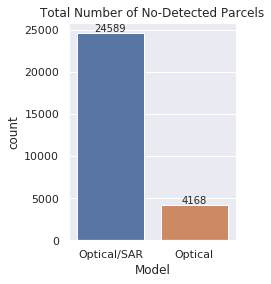

In [20]:
# Bar plot - Count Plot
# Count the data points based on a certain categorical column
import seaborn as sns
plt.figure(figsize = (3, 4))
ocean_plot = sns.countplot(x = 'Model', data = df_4_all)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title('Total Number of No-Detected Parcels')
#plt.xlabel("Type of Parcel")
# plt.ylabel("Count of Class")

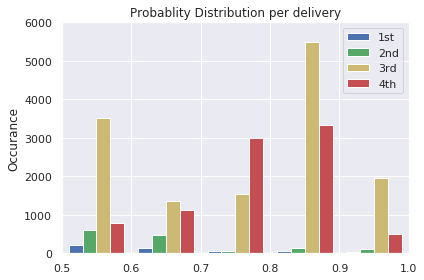

In [6]:
#makes the data
y4 = df_4.Prob_4
y3 = df_3.Prob_3
y2 = df_2.Prob_2
y1 = df_1.Prob_1

bins_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
colors = ['b','g','y','r']

#plots the histogram
fig, ax1 = plt.subplots()
ax1.hist([y1,y2,y3,y4], color=colors, bins = bins_list, label=['1st', '2nd',"3rd","4th"])

ax1.set_xlim(0.5,1)
ax1.set_ylim(0,6000)
ax1.set_ylabel("Occurance")
plt.title('Probablity Distribution per delivery')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

In [7]:
df_1_detected_all = df_1[df_1.Prob_1>=0.7]
df_1_detected = df_1_detected_all.groupby('Model').agg({'Prob_1': ['count','mean', 'min', 'max']})
df_1_detected


Prob_1                     
             count      mean  min   max
Model                                  
Optical         37  0.772703  0.7  0.91
Optical/SAR    106  0.845000  0.7  0.99

In [21]:
df_2_detected_all = df_2[df_2.Prob_2>=0.5]
df_2_detected = df_2_detected_all.groupby('Model').agg({'Prob_2': ['count','mean', 'min', 'max']})
df_2_detected

Prob_2                     
             count      mean  min   max
Model                                  
Optical        268  0.582612  0.5  0.85
Optical/SAR   1116  0.661461  0.5  0.99

In [22]:
df_3_detected_all = df_3[df_3.Prob_3>=0.5]
df_3_detected = df_3_detected_all.groupby('Model').agg({'Prob_3': ['count','mean', 'min', 'max']})
df_3_detected

Prob_3                     
             count      mean  min   max
Model                                  
Optical        899  0.656429  0.5  0.94
Optical/SAR  12962  0.768789  0.5  1.00

In [23]:
df_4_detected_all = df_4[df_4.Prob_4>=0.5]
df_4_detected = df_4_detected_all.groupby('Model').agg({'Prob_4': ['count','mean', 'min', 'max']})
df_4_detected

Prob_4                     
             count      mean  min   max
Model                                  
Optical        791  0.619317  0.5  0.95
Optical/SAR   7970  0.784123  0.5  1.00

In [11]:
total_parcels_05 =  len(df_1_detected_all) + len(df_2_detected_all) + len(df_3_detected_all) + len(df_4_detected_all)
total_parcels_05

24149

## No-detected Parcels

In [13]:
df_4_all['Detection'] = np.where(((df_4_all.Prob_1 ==0 ) & (df_4_all.Prob_2 == 0 ) & (df_4_all.Prob_3 == 0 ) & (df_4_all.Prob_4 == 0 ) ),0, 1)
df_4_all[df_4.columns[-17:]].head(5)
# output_shape_filename_notDected= f'/home/jovyan/exchange/LBST/deliveries/maize-harvest_{ymd}_notDetected.shp'
# df_notDetected.to_file(output_shape_filename_notDected)

,Shape_Area,Prob_1,Date 1_1,Date 1_2,Prob_2,Date 2_1,Date 2_2,Prob_3,Date 3_1,Date 3_2,Prob_4,Date 4_1,Date 4_2,Model,Analysis,RS Exclude,geometry
0,82065.253366,0.67,2021-08-15,2021-08-17,0.67,2021-08-15,2021-08-17,0.00,None,None,0.00,None,None,Optical/SAR,Normal,0,"POLYGON ((673897.5259999996 6083414.507999999,..."
1,95984.144503,0.00,None,None,0.00,None,None,0.00,None,None,0.85,2021-10-11,2021-10-13,Optical/SAR,Normal,0,"POLYGON ((465502.2819999997 6157687.241, 46550..."
2,101961.803792,0.00,None,None,0.62,2021-09-26,2021-09-29,0.00,None,None,0.00,None,None,Optical/SAR,Normal,0,"POLYGON ((559524.2390000001 6339949.557, 55957..."
3,8413.989062,0.00,None,None,0.00,None,None,0.00,None,None,0.47,2021-09-29,2021-10-23,Optical,Normal,0,"POLYGON ((656455.0630000001 6151792.653000001,..."
4,32184.649351,0.00,None,None,0.00,None,None,0.86,2021-10-08,2021-10-11,0.00,None,None,Optical/SAR,Normal,0,"POLYGON ((518769.1430000002 6094874.327, 51874..."


In [16]:
df_notDetected = df_4_all.loc[df_4_all.Detection==0] 
df_notDetected[df_notDetected.columns[-17:]].head(5)

,Prob_1,Date 1_1,Date 1_2,Prob_2,Date 2_1,Date 2_2,Prob_3,Date 3_1,Date 3_2,Prob_4,Date 4_1,Date 4_2,Model,Analysis,RS Exclude,geometry,Detection
7,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,Optical,Small,0,"POLYGON ((540028.0870000003 6331251.548, 54002...",0
68,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,Optical/SAR,Normal,0,"POLYGON ((523364.8949999996 6087246.731000001,...",0
90,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,Optical/SAR,Normal,0,"POLYGON ((459189.2740000002 6191151.691, 45911...",0
202,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,Optical,Small,0,"POLYGON ((649033.8449999997 6127187.393999999,...",0
220,0.0,None,None,0.0,None,None,0.0,None,None,0.0,None,None,Optical/SAR,Normal,0,"POLYGON ((882128.0256000003 6116200.282199999,...",0


Text(0.5,1,'Total Number of No-Detected Parcels')

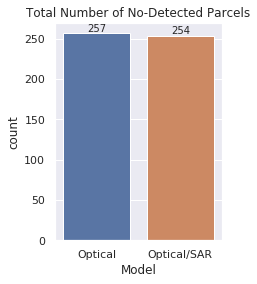

In [17]:
# Bar plot - Count Plot
# Count the data points based on a certain categorical column
import seaborn as sns
plt.figure(figsize = (3, 4))
ocean_plot = sns.countplot(x = 'Model', data = df_notDetected)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title('Total Number of No-Detected Parcels')
#plt.xlabel("Type of Parcel")
# plt.ylabel("Count of Class")